In [17]:
import numpy as np
import sympy as sp
from sympy import *
from sympy import Matrix
import matplotlib.pyplot as pyplot
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
from numpy import linalg
import cmath
%matplotlib inline
from mpl_toolkits import mplot3d
import time
import numba
from numba import jit

In [18]:
import nbimporter
import Functions_Hofstatder as Fun_Hof

# Toroidal boundary conditions

## Spectrum of toroidal Hofstatder Hamiltonian

In [19]:
p = 1
q = 3
Lx = 10**2
Ly = 10**2
dkx = 2*np.pi/Lx
dky = 2*np.pi/Ly
kx_list = np.arange(-Ly/2,Ly/2,1)*dkx
ky_list = np.arange(-Ly/2,Ly/2,1)*dky/q

eigValues = 1j*np.zeros((len(kx_list),len(ky_list),q))

In [20]:
start = time.time()

i = -1
j = 0
a = 1
for kx in kx_list:
    i += 1
    j = 0
    for ky in ky_list:
                
        for l in range(q): 
            eigValues[i,j,l] = linalg.eigh(Fun_Hof.H_Hofstatder_tore(kx,ky,p,q))[0][l]       
        
        j += 1
        
    
print("Execution time:",time.time()-start,"secondes")

Execution time: 2.5117299556732178 secondes


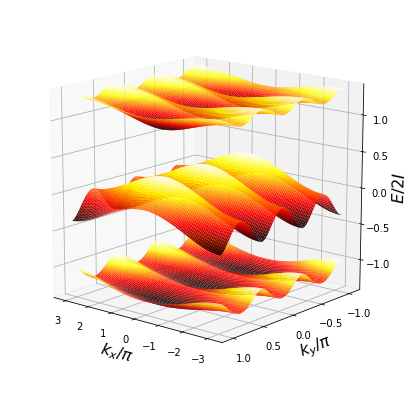

In [28]:
if (len(ky_list)==1 or len(kx_list)==1):
    fig_E_Hof = pyplot.figure(figsize=(8,8))
    ax1 = pyplot.subplot(111)

    for l in range(q):
        #ax1.plot(kx_list,eigValues[:,:,l].real,'b-',label='$E_0(k)$')
        ax1.plot(ky_list,eigValues[0,:,l].real,'b-',label='$E_0(k)$')
    
    ax1.set_xlabel('$k_y$',Fontsize=14)
    ax1.set_ylabel('$E$',Fontsize=14)
    ax1.grid(axis='both')
    #ax1.legend(loc = 4);

if (len(ky_list)>1 and len(kx_list)>1):
    [Kx,Ky] = np.meshgrid(kx_list,ky_list)
    J = 1
    figE = pyplot.figure(figsize=(7,7))
    ax = pyplot.axes(projection='3d')
    
    for l in range(q):
        ax.plot_surface(Kx, Ky, eigValues[:,:,l].real/(2*J), rstride=1, cstride=1,
                        cmap='hot', edgecolor='none')
        ax.view_init(elev=15, azim=130)

    ax.set_xlabel('$k_x/\pi$',Fontsize=16)
    ax.set_ylabel('$k_y/\pi$',Fontsize=16)
    ax.set_zlabel('$E/2J$',Fontsize=16)

In [29]:
figE.savefig("spectrum_tore.png")

## Curvaure with Niu and FHS methods and Chern numbers

Here, we found the Berry curvature associated with every eigenstates of the Bloch Hamiltonian.

### FHS method

In [30]:
p = 1
q = 3
Lx = 10**2
Ly = 10**2
dkx = 2*np.pi/Lx
dky = 2*np.pi/Ly/q 
kx_list = np.arange(-Lx/2,Lx/2,1)*dkx
ky_list = np.arange(0,Ly,1)*dky

Fs = 1j*np.zeros((len(kx_list),len(ky_list),q))

i = -1
for kx in kx_list:
    i += 1
    j = -1
    for ky in ky_list:
        j += 1        
        for l in range(q): 
            Fs[i,j,l] = Fun_Hof.F_Hof(Fun_Hof.H_Hofstatder_tore,l,kx,ky,dkx,dky,p,q)
            

### Niu method results

In [31]:
F_Niu_s = 1j*np.zeros((len(ky_list),q))

In [32]:
i = 0
for ky in ky_list:
    for l in range(q):
        F_Niu_s[i,l] = Fun_Hof.F_Niu_Hof(Fun_Hof.H_Hofstatder_tore,l,kx_list[0],ky,p,q)
    i += 1

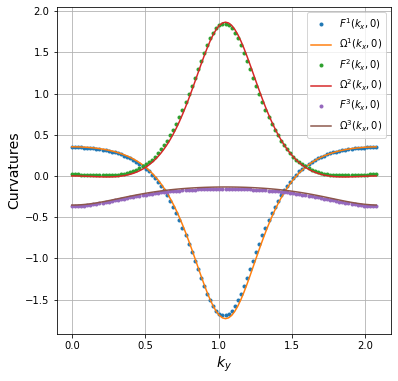

In [52]:
fig_F_Hof = pyplot.figure(figsize=(6,6))

ax1 = pyplot.subplot(111)
for l in range(q):
    ax1.plot(ky_list,Fs[0,:,l].real,'.',label='$F^{:d}(k_x,0)$'.format(l+1))
    ax1.plot(ky_list,F_Niu_s[:,l].real,'-',label='$\Omega^{:d}(k_x,0)$'.format(l+1)) 
ax1.set_xlabel('$k_y$',Fontsize=14)
ax1.set_ylabel('Curvatures',Fontsize=14)
ax1.grid(axis='both')
ax1.legend();

In [53]:
fig_F_Hof.savefig("comparaisonCurv.png")

### Evolution of the difference between $\Omega$ and $F$ in function of $L_y$.

In [54]:
dky_list = np.array([10**-6,10**-5,10**-4,10**-3,10**-2])
diff_curv = 1j*np.zeros((len(dky_list),q))
i = 0
for dky in dky_list:
    for l in range(q):
        diff_curv[i,l] = Fun_Hof.F_Niu_Hof(Fun_Hof.H_Hofstatder_tore,l,kx_list[0],ky_list[int(len(ky_list)/2)],p,q)\
                       - Fun_Hof.F_Hof(Fun_Hof.H_Hofstatder_tore,l,kx_list[0],ky_list[int(len(ky_list)/2)],dkx,dky,p,q)
    i += 1

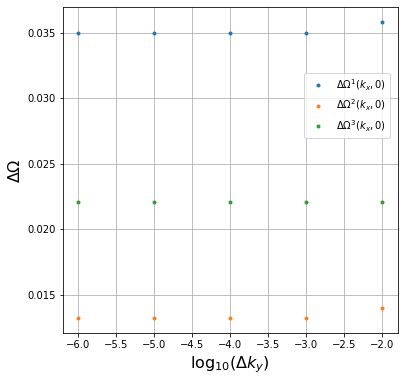

In [64]:
fig_diff_curv = pyplot.figure(figsize=(6,6))

ax1 = pyplot.subplot(111)
for l in range(q):
    ax1.plot(np.log10(dky_list),abs(diff_curv[:,l].real),'.',label='$\Delta \Omega^{:d}(k_x,0)$'.format(l+1)) 
ax1.set_xlabel('$\log_{10}(\Delta k_y)$',Fontsize=16)
ax1.set_ylabel('$\Delta \Omega$',Fontsize=16)
ax1.grid(axis='both')
ax1.legend(loc=(0.72,0.6));

In [65]:
fig_diff_curv.savefig("diff_curv.png")

### Chern numbers

In [16]:
start = time.time()

p = 1
q = 3
dkx = 2*np.pi/100
dky = 2*np.pi/100/q
kx_list = np.arange(-np.pi,np.pi,dkx)    # np.arange() doesn't contain the upper limit
ky_list = np.arange(0,2*np.pi/q,dky)
cherns = 1j*np.zeros(q)

for i in range(q):
    cherns[i] = Fun_Hof.chern(i,Fun_Hof.F_Hof,kx_list,ky_list,dkx,dky,p,q)

print("Execution time:",time.time()-start,"secondes")
print((cherns/2/np.pi).real)

Execution time: 9.83934736251831 secondes
[-1.  2. -1.]


# Problem in Bernevig's book

#det = 1j*np.zeros((len(kx_list),len(ky_list)))
#det[i,j] = -eigValues[i,j,0]**3 + eigValues[i,j,0]*6*J**2 - 2*J**3*(np.cos(3*a*kx)+np.cos(3*a*ky))
#pyplot.plot(kx_list,det.real)
#pyplot.plot(kx_list,det.imag);


Apparently, there is a problem in Bernevig's book. The caracteristic polynom in Bernevig's book is
$$ F(E) - 2t_b^q \cos(3a k_y)+2t_a^q  \cos(3ak_x)$$
but it seems it must be
$$ F(E) + 2t_b^q \cos(3a k_y)+2t_a^q  \cos(3ak_x)$$

In my case (1/3), my caracteristic polynom ($t_b = t_a = J$) is
$$ -E^3 + 6 J^2 E - 2J^3(\cos(3a k_y)+  \cos(3ak_x))$$
and is well equal to zero with my eigenvalues.